In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('voice.csv')
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df.shape

(5013, 21)

In [7]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Pie chart


In [8]:
df['label'].value_counts()

female    2828
male      2185
Name: label, dtype: int64

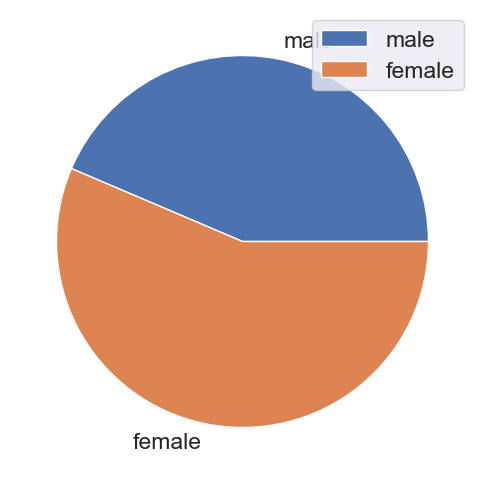

In [63]:
val= [2185,2828]
label = ['male','female']
plt.figure(figsize=(6,8))
plt.pie(val,labels=label)
plt.legend()
plt.show()


## Exploratory Data Analysis

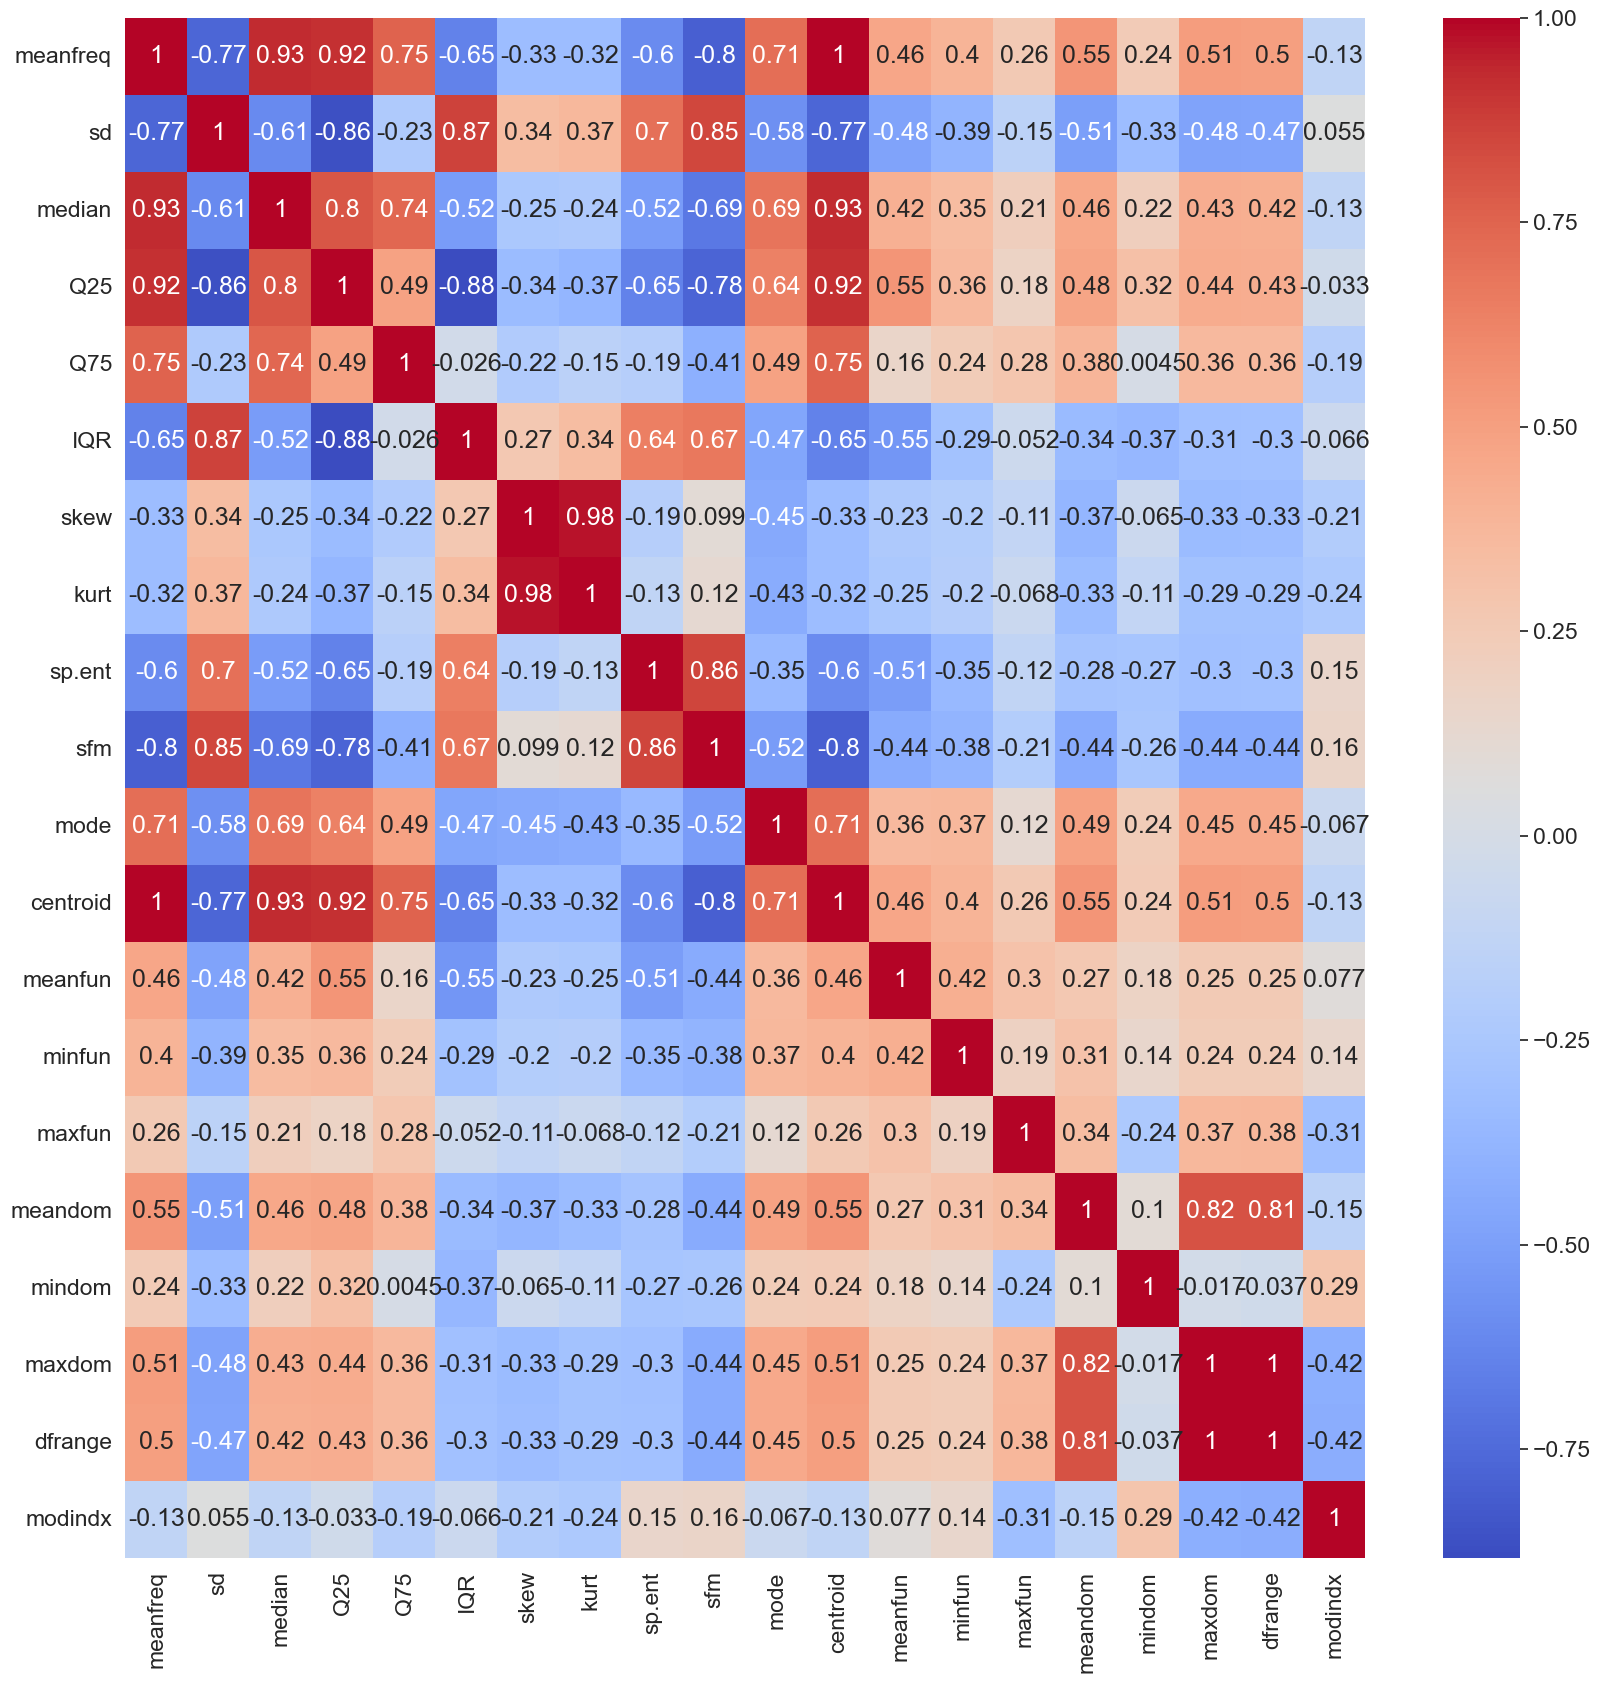

In [10]:
corr = df.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True,cmap='coolwarm')
plt.show()

## We will do EDA on similar columns with correlation higher than 0.8 and remove the columns which will not fetch us important patterns.

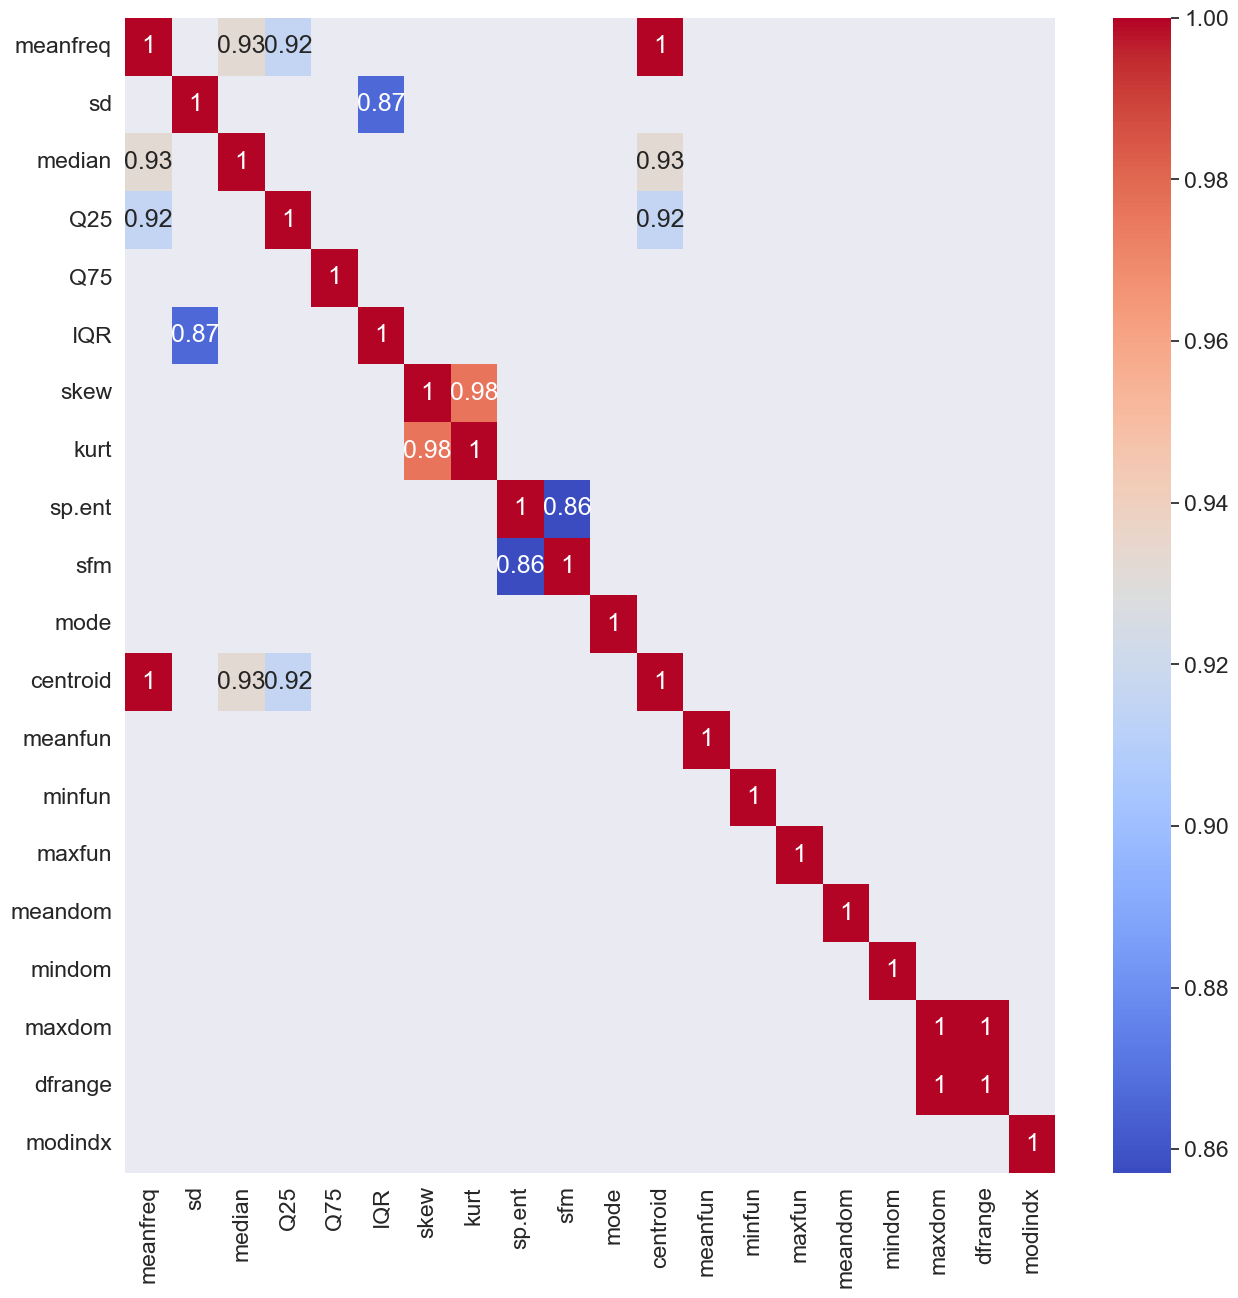

In [11]:
corr = df.corr()
corr = corr[corr>0.85]
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True,cmap='coolwarm')
plt.show()


In [12]:
df = df.drop(['meanfreq','centroid',],axis=1) 
#we removed meanfreq and centroid as it had the maximum correlated columns

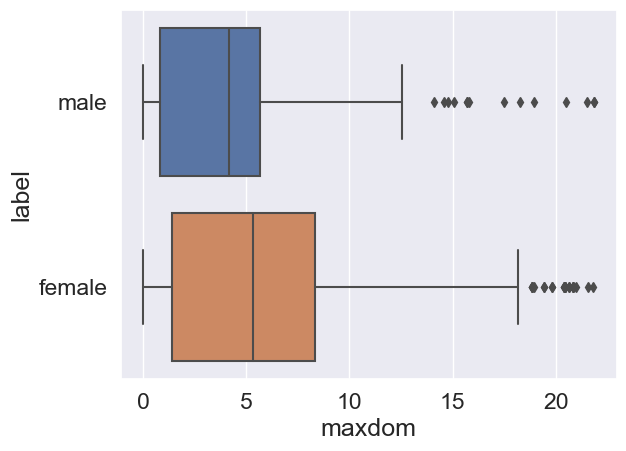

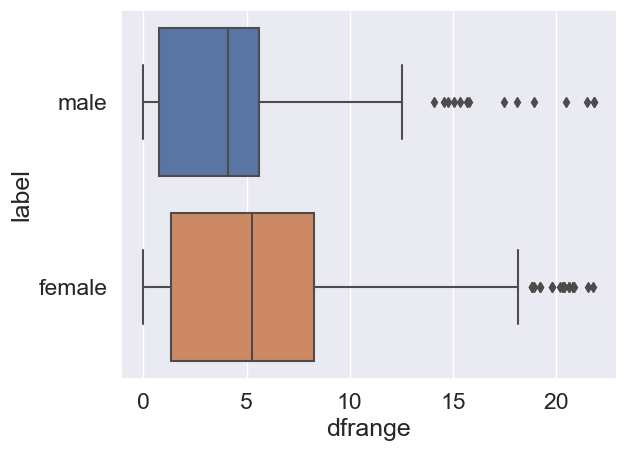

In [13]:
sns.boxplot(x=df.maxdom,y=df.label)
plt.show()
sns.boxplot(x=df.dfrange,y=df.label)
plt.show()


In [14]:
df = df.drop(['dfrange','maxdom'],axis=1)

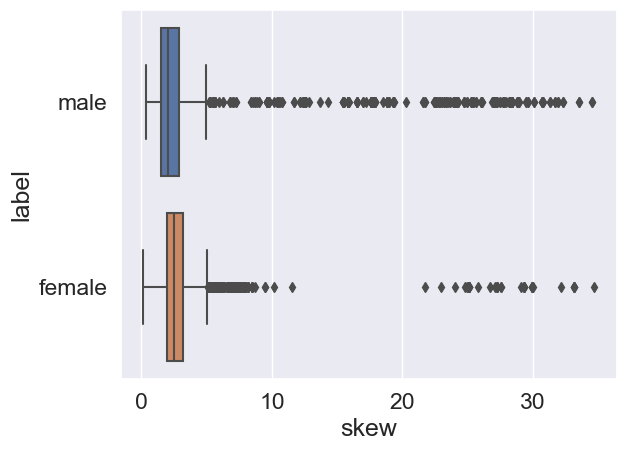

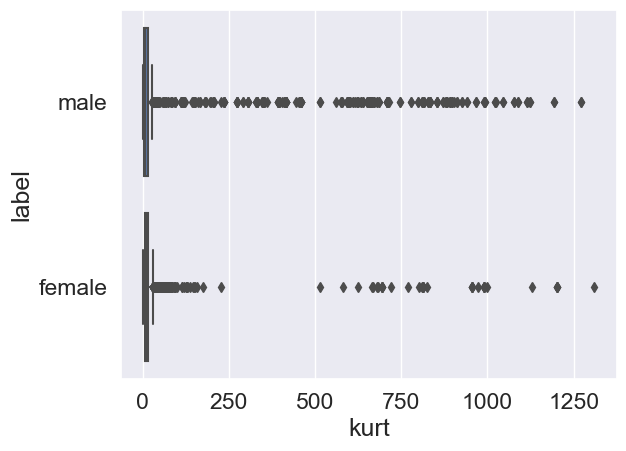

In [15]:
sns.boxplot(x=df['skew'],y=df.label)
plt.show()
sns.boxplot(x=df['kurt'],y=df.label)
plt.show()

In [16]:
df = df.drop(['kurt','skew'],axis=1)

### We removed both kurt and skew as it had too many outliers. It is bad for the training.


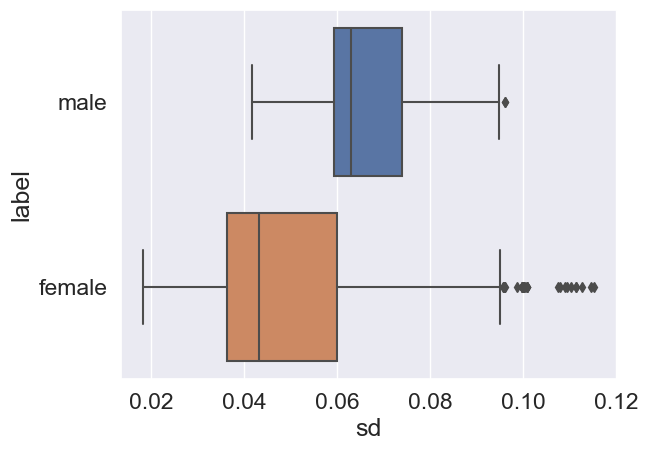

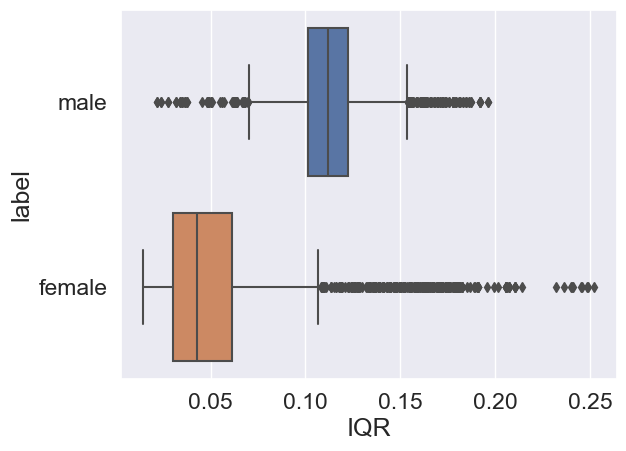

In [17]:
sns.boxplot(x=df['sd'],y=df.label)
plt.show()
sns.boxplot(x=df['IQR'],y=df.label)
plt.show()

In [18]:
df = df.drop(['IQR'],axis=1)

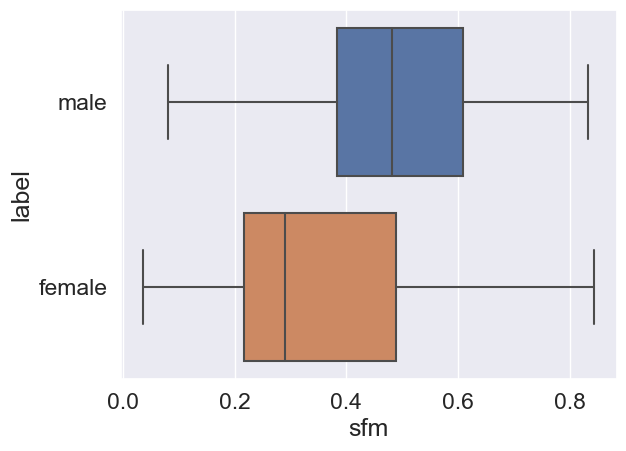

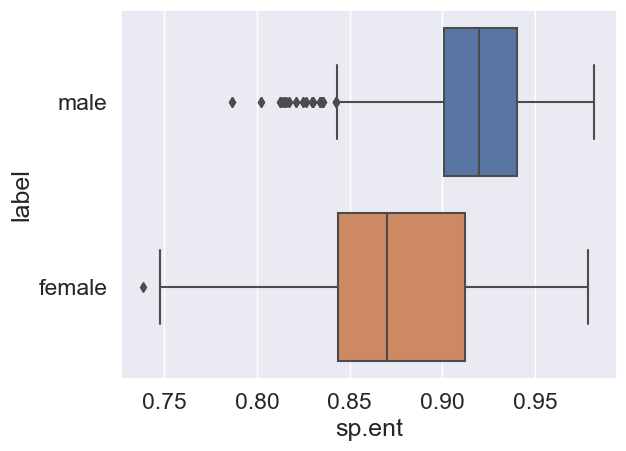

In [19]:
sns.boxplot(x=df['sfm'],y=df.label)
plt.show()
sns.boxplot(x=df['sp.ent'],y=df.label)
plt.show()

In [20]:
df = df.drop('sp.ent',axis=1)
#We will remove sp.ent as it has more outliers

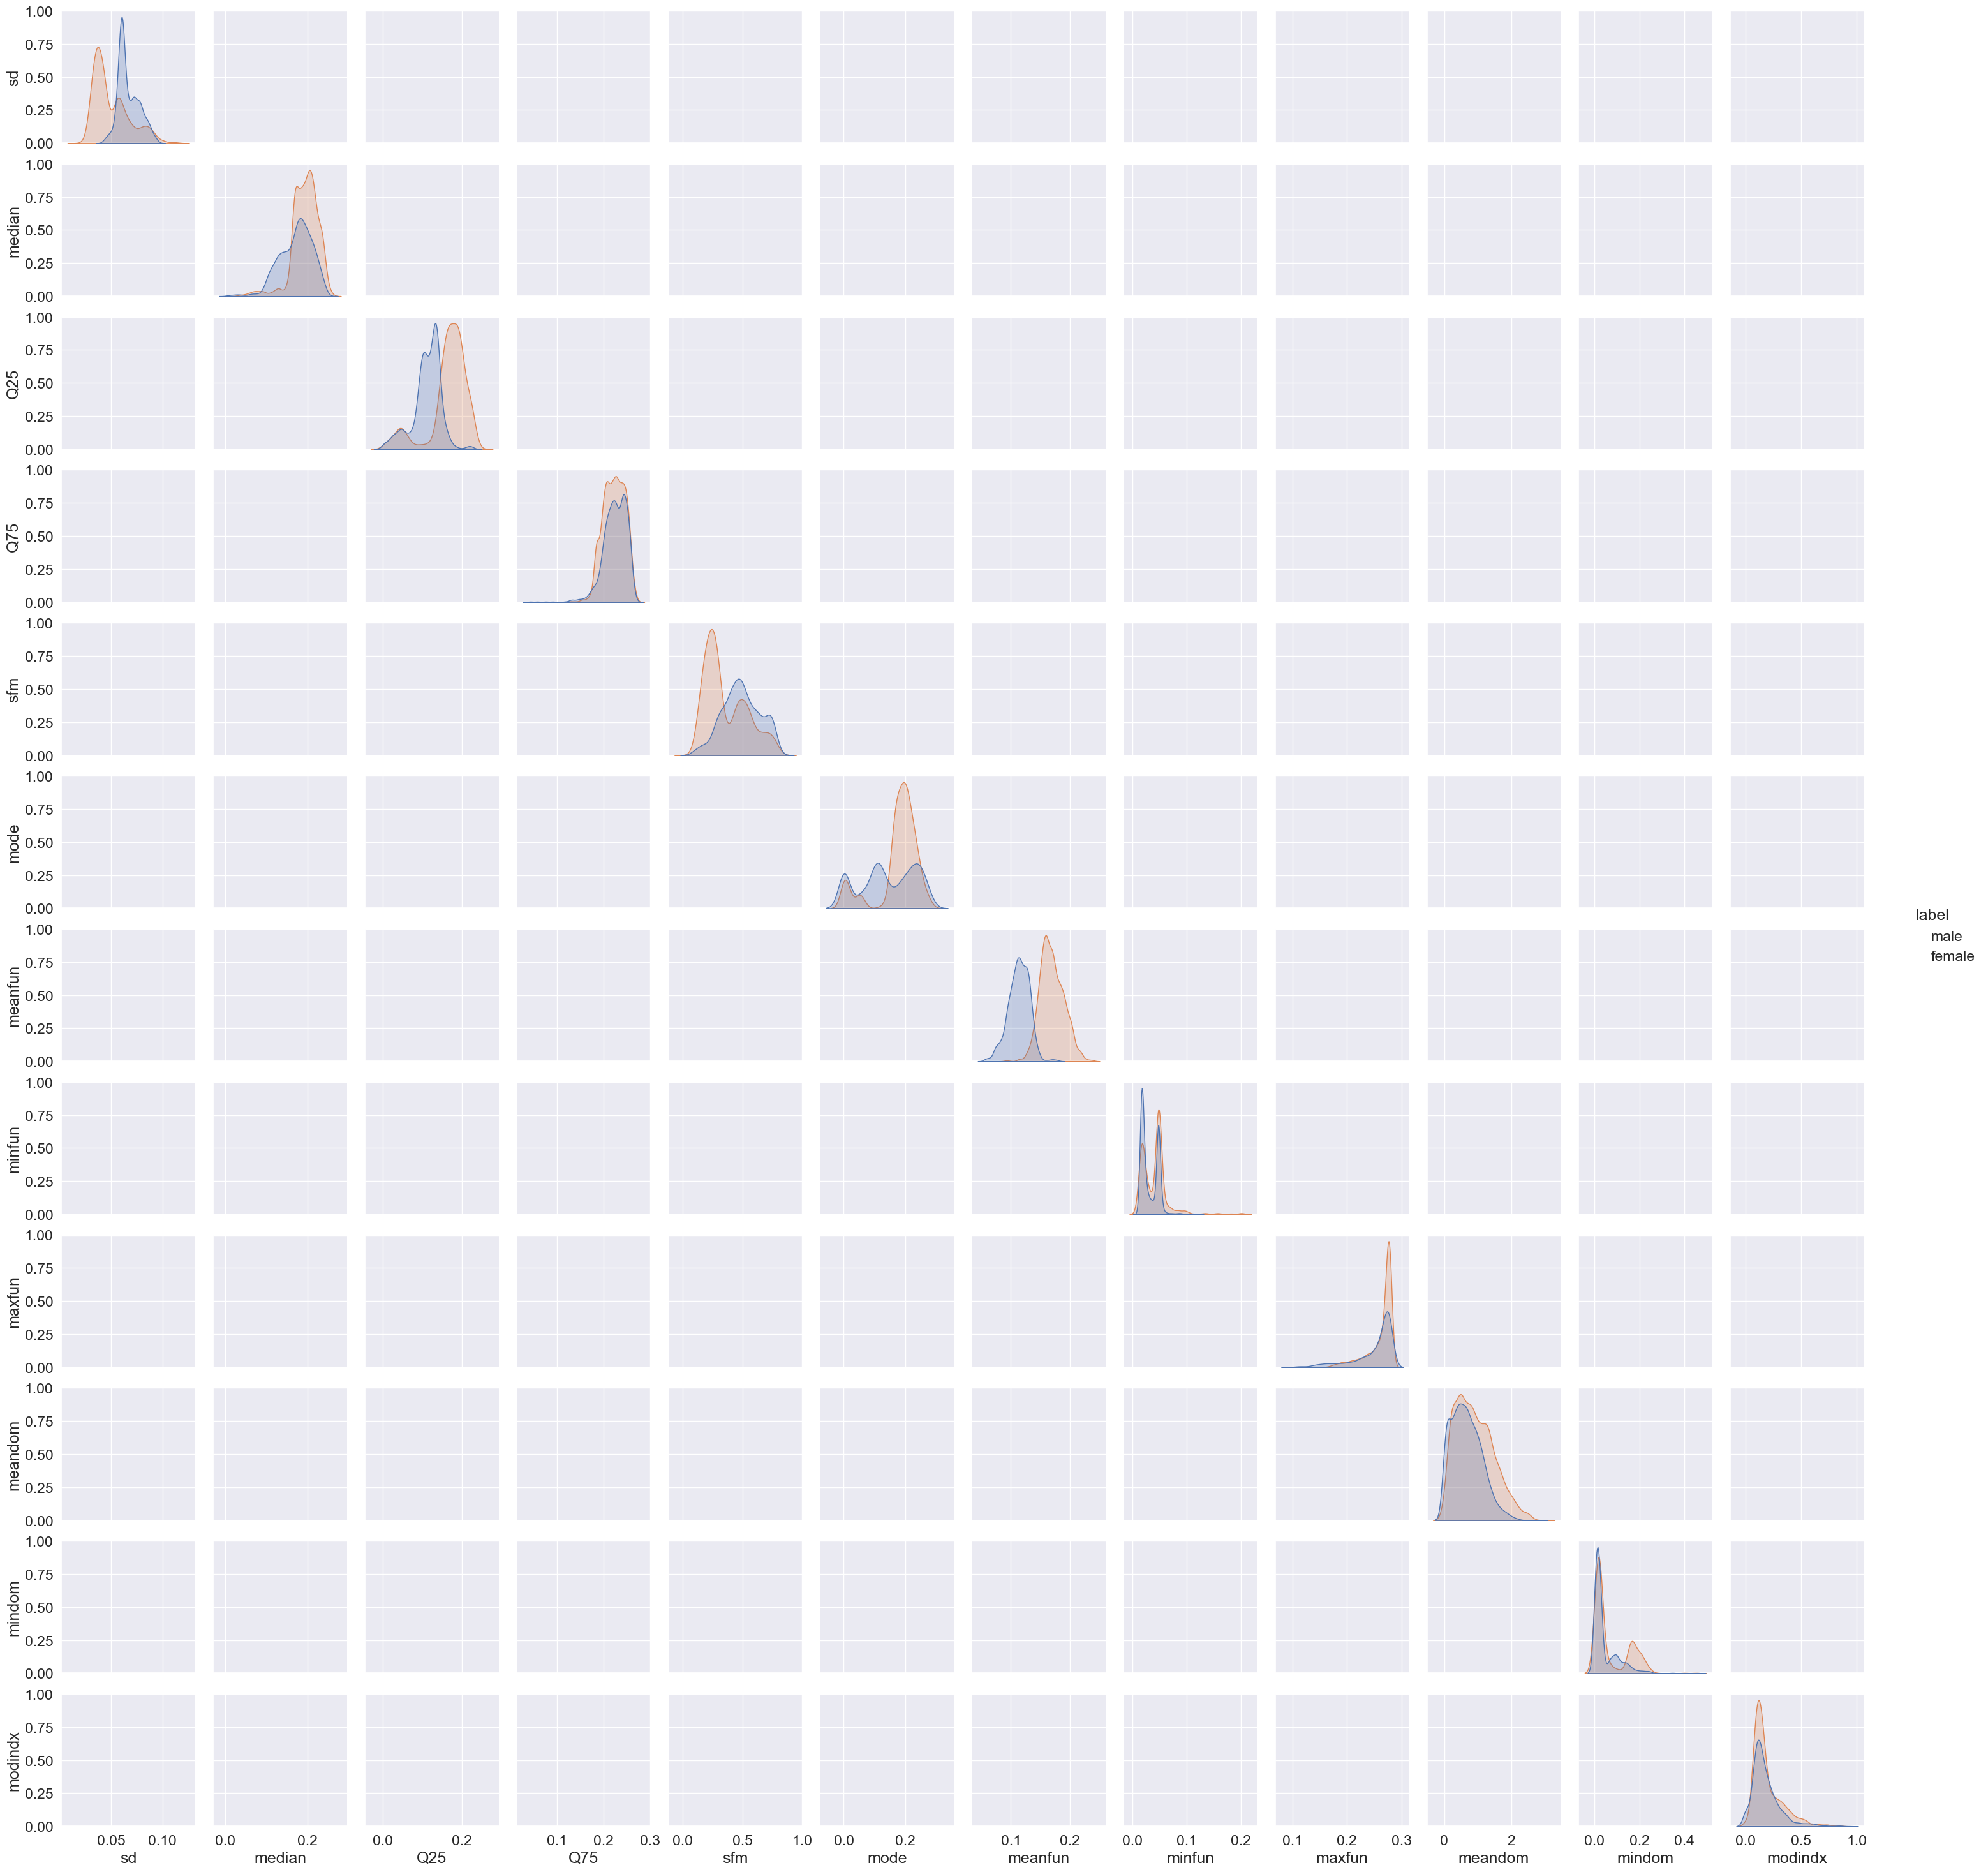

In [21]:
sns.pairplot(df,kind = 'scatterplot',hue='label')
plt.show()

In [22]:
df = df.drop(['maxfun','modindx','minfun'],axis=1) 
#these columns have too many outliers

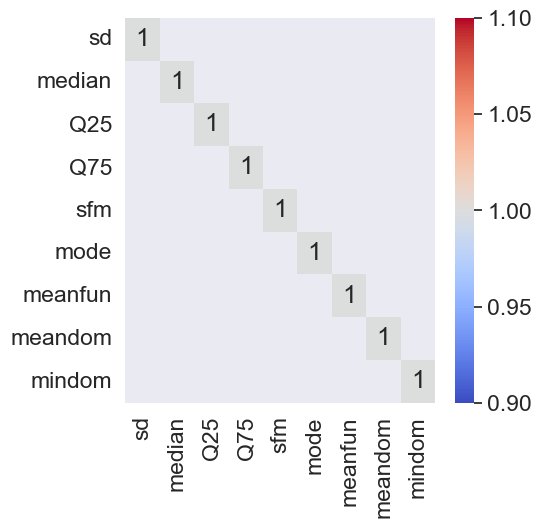

In [23]:
corr = df.corr()
corr = corr[corr>0.85]
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot = True,cmap='coolwarm')
plt.show()


## Train-Test Split¶

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.iloc[:,:-1]
y = df.label

In [29]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

## Metric Functions

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
def eval(y_pred,ytest):
    print("Confusion matrix:\n")
    cm = confusion_matrix(y_pred,ytest)
    sns.heatmap(cm,annot = True,xticklabels=["Female","Male"],yticklabels=["Female","Male"])
    plt.show()
    print("Classification Report\n",classification_report(y_pred,ytest))

In [32]:
def score(model):
    print("Training score: ",model.score(X_train,y_train))
    print("Test score: ",model.score(x_test,y_test))

## 1) DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DTmodel = DecisionTreeClassifier(min_samples_split = 5,max_depth = 10,random_state = 0)

In [35]:
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=0)

In [36]:
ypred1 = DTmodel.predict(x_test)
ypred1[:5]

array(['female', 'male', 'male', 'female', 'male'], dtype=object)

In [37]:
score(DTmodel)

Training score:  0.9972568578553616
Test score:  0.9730807577268196


Confusion matrix:



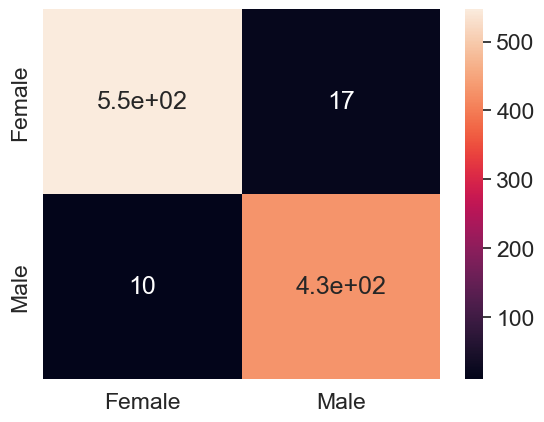

Classification Report
               precision    recall  f1-score   support

      female       0.98      0.97      0.98       564
        male       0.96      0.98      0.97       439

    accuracy                           0.97      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003



In [38]:
eval(ypred1,y_test)

## 2) LogisticRegression¶

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LRmodel = LogisticRegression(n_jobs=3,max_iter=1000,class_weight=0.001,random_state=0)

In [41]:
LRmodel.fit(X_train,y_train)

LogisticRegression(class_weight=0.001, max_iter=1000, n_jobs=3, random_state=0)

In [42]:
ypred2 = LRmodel.predict(x_test)

In [43]:
score(LRmodel)

Training score:  0.9221945137157107
Test score:  0.9172482552342971


Confusion matrix:



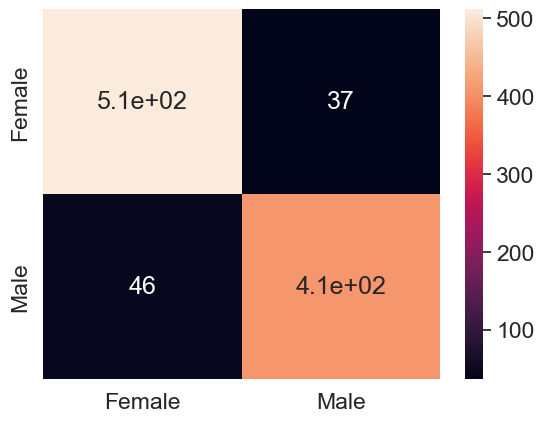

Classification Report
               precision    recall  f1-score   support

      female       0.92      0.93      0.92       548
        male       0.92      0.90      0.91       455

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



In [44]:
eval(ypred2,y_test)

# 3) Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
SVMmodel = SVC(kernel = 'rbf', C=2.0,random_state=0,degree = 3)

In [47]:
SVMmodel.fit(X_train,y_train)

SVC(C=2.0, random_state=0)

In [48]:
ypred3 = SVMmodel.predict(x_test)

In [49]:
score(SVMmodel)

Training score:  0.9807980049875312
Test score:  0.967098703888335


Confusion matrix:



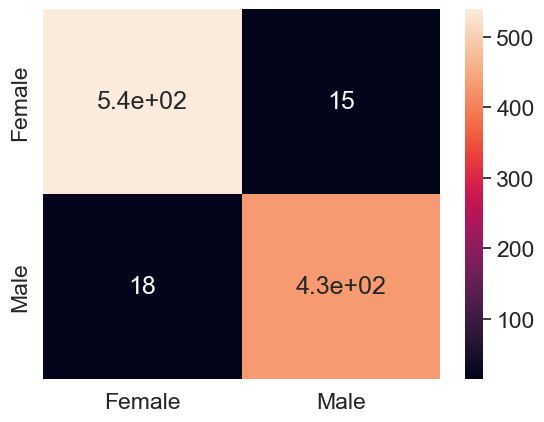

Classification Report
               precision    recall  f1-score   support

      female       0.97      0.97      0.97       554
        male       0.97      0.96      0.96       449

    accuracy                           0.97      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003



In [50]:
eval(ypred3,y_test)

# 4) K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
Kmodel = KNeighborsClassifier(n_neighbors = 4,metric ='minkowski',p=1,n_jobs=5,algorithm='ball_tree')

In [53]:
Kmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=5, n_neighbors=4, p=1)

In [54]:
ypred4 = Kmodel.predict(x_test)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
score(Kmodel)

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training score:  0.9802992518703242
Test score:  0.9661016949152542


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion matrix:



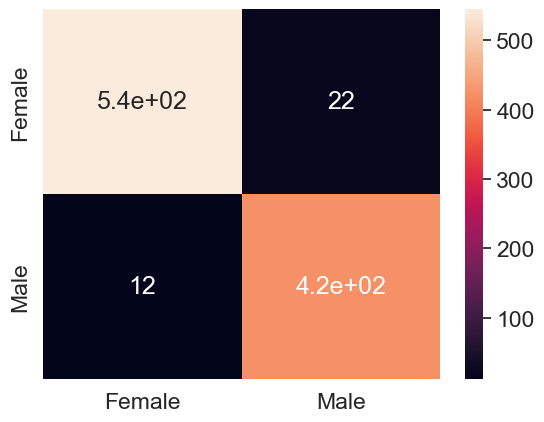

Classification Report
               precision    recall  f1-score   support

      female       0.98      0.96      0.97       567
        male       0.95      0.97      0.96       436

    accuracy                           0.97      1003
   macro avg       0.96      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003



In [56]:
eval(ypred4,y_test)

# 5) Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RFmodel = RandomForestClassifier(n_estimators = 1000,max_depth = 11,n_jobs=5,criterion='gini',warm_start=True,min_samples_split=4,oob_score=True)

In [59]:
RFmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_split=4, n_estimators=1000,
                       n_jobs=5, oob_score=True, warm_start=True)

In [60]:
ypred5 = RFmodel.predict(x_test)

In [61]:
score(RFmodel)

Training score:  0.9997506234413965
Test score:  0.9770687936191426


Confusion matrix:



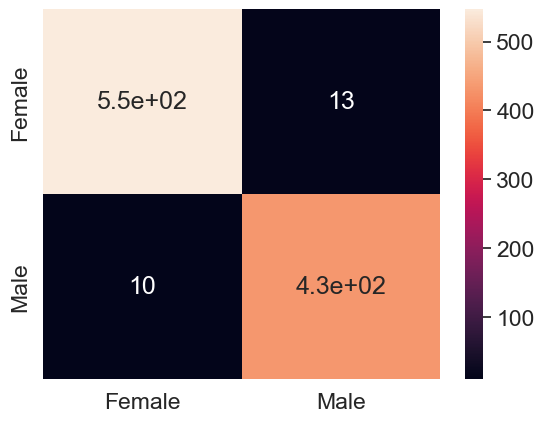

Classification Report
               precision    recall  f1-score   support

      female       0.98      0.98      0.98       560
        male       0.97      0.98      0.97       443

    accuracy                           0.98      1003
   macro avg       0.98      0.98      0.98      1003
weighted avg       0.98      0.98      0.98      1003



In [62]:
eval(ypred5,y_test)